# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data = pd.concat([study_results,mouse_metadata], axis=1, join="inner")
combine_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_unique_mouse_id = len(combine_data["Mouse ID"].unique())
number_unique_mouse_id

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mouse_ids = combine_data[combine_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = combine_data[combine_data["Mouse ID"] == 'g989']
duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

new_data = combine_data[combine_data["Mouse ID"] != 'g989']
new_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_new_data = len(new_data["Mouse ID"].unique())
number_of_new_data

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor_volume = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std dev.': std_tumor_volume,
    'Tumor Volume Std err.': sem_tumor_volume
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std dev.,Tumor Volume Std err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_1 = new_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg([
    'mean','median','var','std','sem'])
summary_stats_1

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
bar_data = new_data.groupby('Drug Regimen').count()["Timepoint"]
bar_data = bar_data.sort_values(ascending=False)

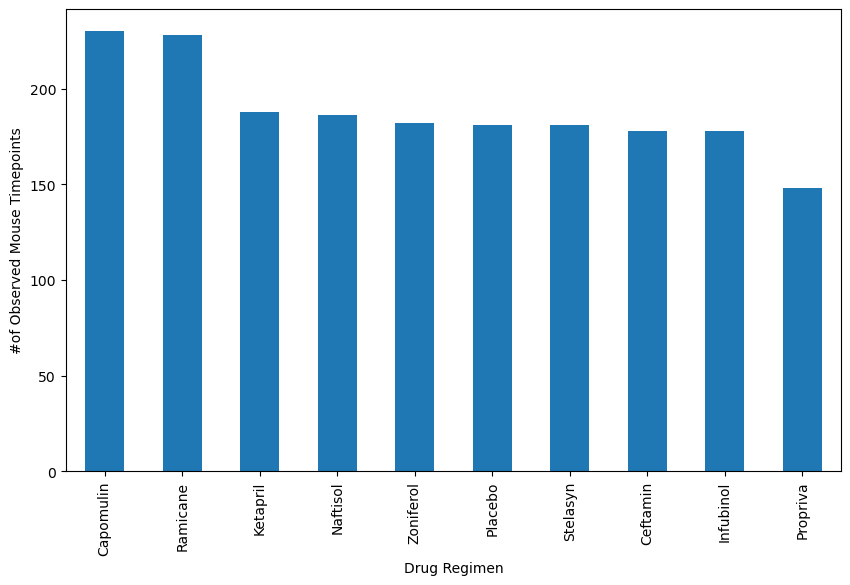

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data.plot(kind="bar", figsize=(10,6))
plt.xlabel("Drug Regimen")
plt.ylabel("#of Observed Mouse Timepoints")
plt.show()

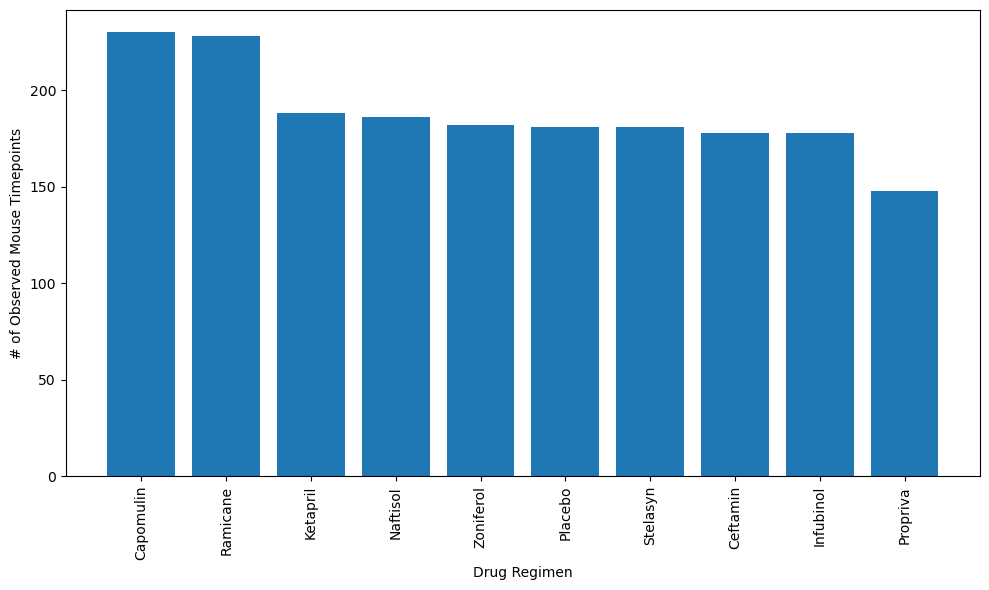

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


plt.figure(figsize=(10,6))
plt.bar(bar_data.index, bar_data.values)

plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [12]:
pie_data = combine_data.groupby('Sex').count()["Mouse ID"]
pie_data = pie_data.sort_values(ascending=False)
pie_data

Sex
Male      958
Female    935
Name: Mouse ID, dtype: int64

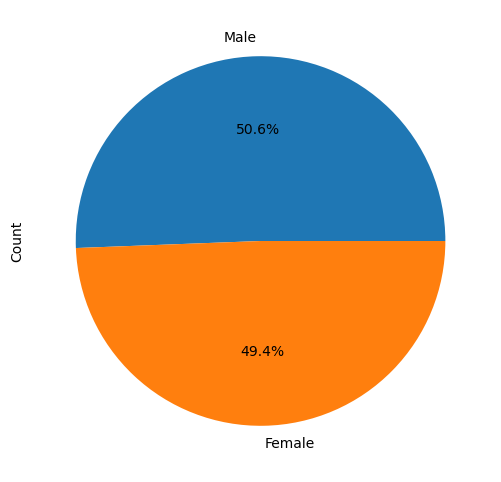

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
pie_data.plot(kind="pie", autopct='%1.1f%%', figsize=(10,6))

plt.ylabel("Count")
plt.show()

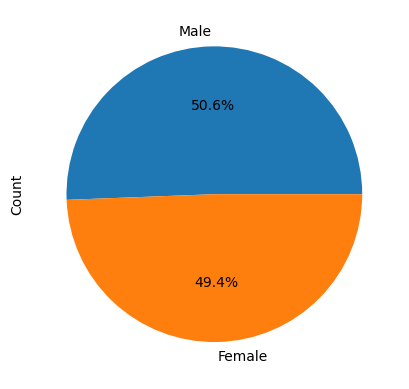

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.pie(pie_data, labels=pie_data.index, autopct="%1.1f%%")
plt.ylabel("Count")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = combine_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(final_timepoint, combine_data, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] 
                                            == drug]['Tumor Volume (mm3)']
    tumor_vol_data.append(final_tumor_vol)
    # add subset
    quartiles = final_tumor_vol.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


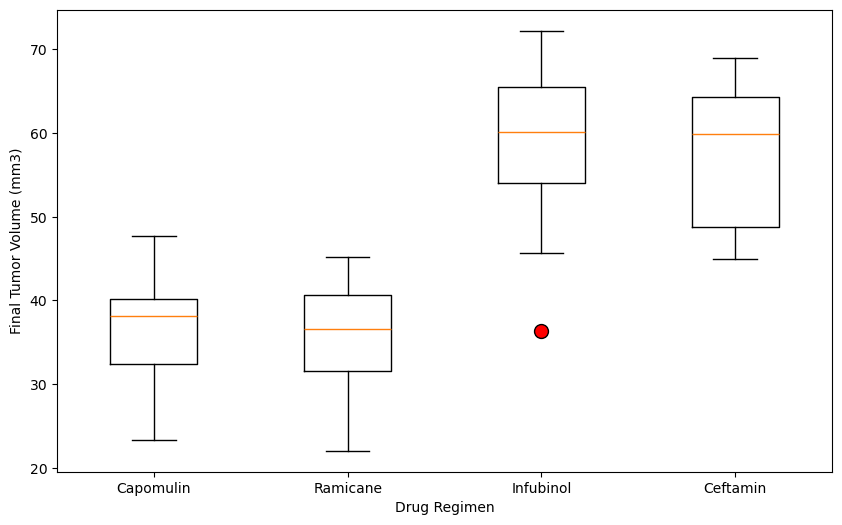

In [32]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments,  
            flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})


plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')


plt.show()


## Line and Scatter Plots

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = combine_data[(combine_data['Drug Regimen'] == 'Capomulin') & (combine_data['Mouse ID'] == 'l509')]
single_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


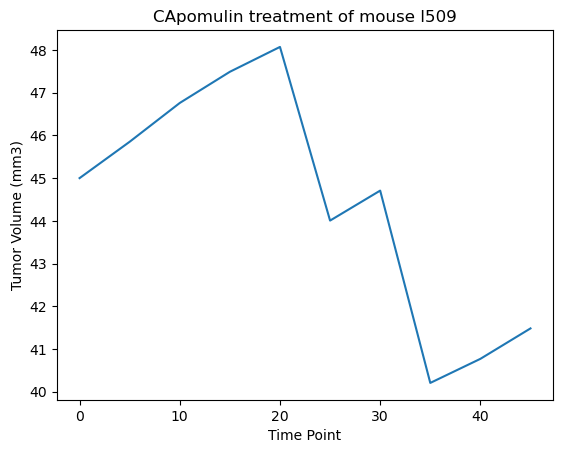

In [30]:
plt.plot(single_mouse_data['Timepoint'],single_mouse_data['Tumor Volume (mm3)'],linestyle='-')
plt.title('CApomulin treatment of mouse l509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time Point')
plt.show()

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_data = combine_data[combine_data['Drug Regimen'] == 'Capomulin']
Capomulin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [21]:
mean_capomulin_tumor_vol = Capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mean_capomulin_tumor_vol
# I tried to get the mean of tumor volume based on each mouse id


Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [22]:
cap_data = pd.DataFrame(mean_capomulin_tumor_vol)
cap_data
#cuz its series, i have to change into dataframe

,Tumor Volume (mm3)
Mouse ID,
b128,41.963636
b742,40.083699
f966,36.505973
g288,41.990097
g316,44.613344
i557,44.805810
i738,39.141053
j119,44.465236
j246,43.216925


In [28]:
new_cap_data = pd.merge(Capomulin_data, cap_data, on='Mouse ID', how='left')
new_cap_data = new_cap_data.drop(columns=['Tumor Volume (mm3)_x'])
new_cap_data = new_cap_data.rename(columns={'Tumor Volume (mm3)_y': 'Tumor Volume (mm3)'})
new_cap_data

#cuz they have the same name one is "_x" one is "_y" so i rename and droped

,Mouse ID,Timepoint,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)
0,b128,0,0,Capomulin,Female,9,22,41.963636
1,j246,0,0,Capomulin,Female,21,21,43.216925
2,r554,0,0,Capomulin,Female,8,17,36.509212
3,s185,0,0,Capomulin,Female,3,17,34.559143
4,b742,0,0,Capomulin,Male,7,21,40.083699
...,...,...,...,...,...,...,...,...
225,s710,45,1,Capomulin,Female,1,23,42.803733
226,j119,45,1,Capomulin,Female,7,23,44.465236
227,i557,45,1,Capomulin,Female,1,24,44.805810
228,r944,45,2,Capomulin,Male,12,25,43.367364


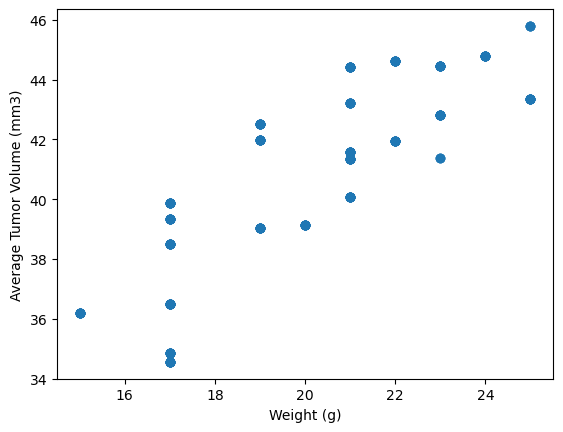

In [29]:
x_values = new_cap_data['Weight (g)']
y_values = new_cap_data['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [25]:
# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

In [26]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

'y = 0.96x +21.49'

The correlation between mouse weight and the average tumor volume is : 0.84


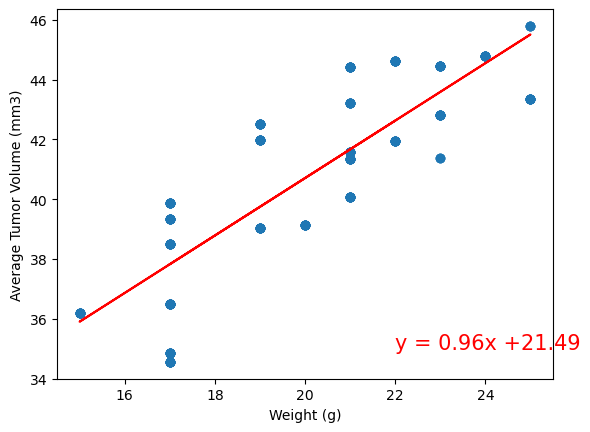

In [27]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")


plt.annotate(line_eq,(22,35),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


mean_weights = Capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
correlation = mean_weights.corr(mean_capomulin_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is : {correlation:.2f}")

plt.show()